# Compare Motions
The purpose of this notebook is to compare data of 2 files. The first motion is generated by running the Mahony filter on the raspberry pi. The other motion is generated by saving raw IMU data on the raspberry pi, transferring it to the computer and running the mahony filter there. 

The goal is to develop a python script to process the raw IMU data fully on the computer, for higher raspbery pi sampling rates

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

not_locked = ['time', 'pelvis_rotation', 'lumbar_extension', 'lumbar_bending',
       'lumbar_rotation', 'arm_flex_r', 'arm_add_r', 'arm_rot_r',
       'elbow_flex_r', 'arm_flex_l', 'arm_add_l', 'arm_rot_l', 'elbow_flex_l']

Comparing the motion files. The motion file generated by the RPI was manually processed by Opensim by solving the IK on the quarternions. The other was generated through the visualise script|

In [26]:
rpi_filter = pd.read_csv(r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-04_1618\ik_tiny_file.mot",sep='\t',skiprows=6)
com_filter = pd.read_csv(r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-04_1618\ik_generated_quat_file.mot",sep='\t',skiprows=6)

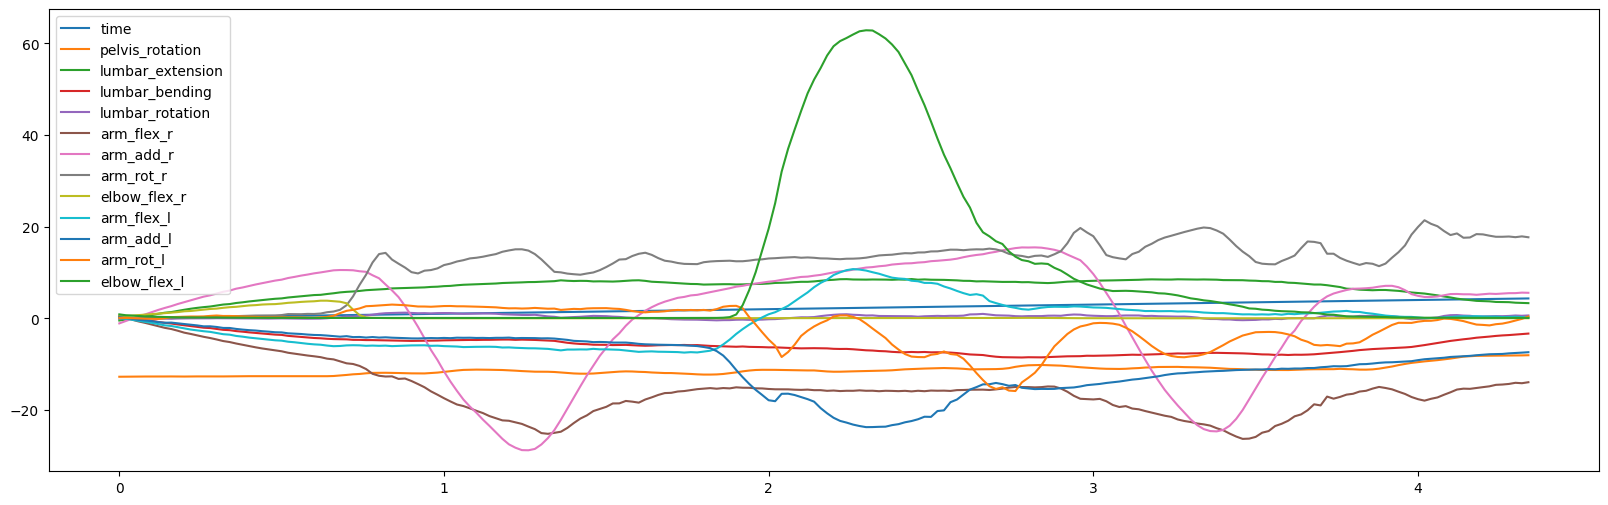

In [27]:
x = rpi_filter["time"]

plt.figure(figsize=(20,6))
for col in not_locked:
    y = rpi_filter[col]
    plt.plot(x,y,label = col)


plt.legend()
plt.show()

In [28]:
ranges = []
for col in not_locked:
    ranges.append((col,com_filter[col].max() - rpi_filter[col].min()))

ranges.sort(key = lambda x: x[1],reverse = True)
for x in ranges[:5]:
    print(x)

('elbow_flex_l', 62.77795494704962)
('arm_add_r', 44.3134733296633)
('arm_flex_r', 26.31917655544927)
('arm_add_l', 23.75331819480715)
('arm_rot_r', 21.430558155076103)


We see the joints with the most variation during the timeframe. Comparing the largest one

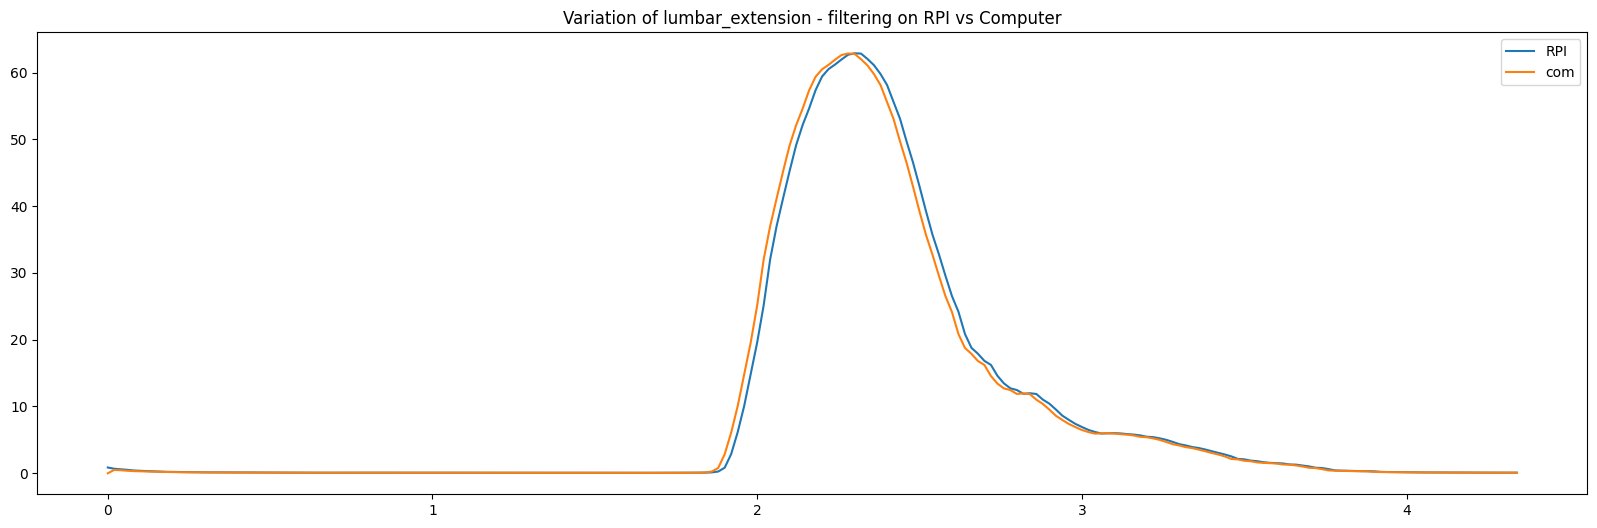

In [29]:
x = rpi_filter["time"]
y_variable = ranges[0][0]

plt.figure(figsize=(20,6))

y = rpi_filter[y_variable]
plt.plot(x,y,label = 'RPI')

y = com_filter[y_variable]
plt.plot(x,y,label = 'com')

plt.title("Variation of lumbar_extension - filtering on RPI vs Computer")


plt.legend()
plt.show()

Comparing the quarternion files

In [30]:
rpi_quat = pd.read_csv(r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-04_1618\tiny_file.sto",sep='\t',skiprows=5)
com_quat = pd.read_csv(r"C:\Users\chris\Documents\Visualisation\Opensim\Results\23-04-04_1618\generated_quat_file.sto",sep='\t',skiprows=5)

In [31]:
rpi_quat.head()

,time,Unnamed: 1,pelvis_imu,torso_imu,humerus_l_imu,ulna_l_imu,humerus_r_imu,ulna_r_imu
0,0.00,"0.6845986384757144,0.5992073308343492,-0.23389...","0.6748422967666571,0.7322308980155436,-0.07630...","0.6714154897949585,0.7408884714097432,-0.01415...","0.6516008630338784,0.7101102297608508,0.142609...","0.7901597551652895,0.6002397139983825,-0.11884...","0.559938594293556,0.33001825327312895,-0.57485...",NaN
1,0.02,"0.6845385689439238,0.5982373636779411,-0.23473...","0.6765456043409287,0.7304421789758371,-0.07737...","0.6707204391851356,0.741489106674814,-0.014786...","0.6518068977919966,0.710110722584152,0.1441120...","0.7890946844343518,0.6018182012481896,-0.11785...","0.5585273319457602,0.3325415913666626,-0.57341...",NaN
2,0.04,"0.684451178503959,0.5971821243987482,-0.235689...","0.6780552223846588,0.7288199294447019,-0.07837...","0.6697127939058783,0.7423759027079002,-0.01508...","0.652235718778069,0.7096825095069531,0.1455787...","0.7878633032073623,0.6034854126890679,-0.11729...","0.5570369074443119,0.33470965500305006,-0.5720...",NaN
3,0.06,"0.684446994611896,0.5962263195479482,-0.236563...","0.6795822065671139,0.727164254052553,-0.079524...","0.6693466730294291,0.7426755711125449,-0.01561...","0.6527725375721827,0.7091588900878537,0.147046...","0.7866985794781591,0.6050695661162118,-0.11668...","0.5554246953949779,0.3369125686261195,-0.57096...",NaN
4,0.08,"0.684386243508055,0.5951993778237671,-0.237396...","0.6810439263490907,0.7255607768709014,-0.08062...","0.6689505388100093,0.74299930950065,-0.0163515...","0.6527624763268769,0.7091416143211805,0.148630...","0.7857826860530325,0.6063983218631412,-0.11594...","0.553797884940141,0.3389405092996335,-0.569893...",NaN


In [32]:
#Strange that the processing of data shifts all the columns

def shift_cols(df):
    old_columns = df.columns
    column_names = ['time', 'pelvis_imu', 'torso_imu', 'humerus_l_imu','ulna_l_imu', 'humerus_r_imu', 'ulna_r_imu']
    col_names = {}
    for i, name in enumerate(column_names):
        col_names[old_columns[i]] = name

    filtered_df = df.drop('ulna_r_imu',axis = 1)
    filtered_df = filtered_df.rename(columns = col_names)

    return filtered_df

rpi_quat_filtered = shift_cols(rpi_quat)
com_quat_filtered = shift_cols(com_quat)

In [33]:
rpi_quat_filtered.head()

,time,pelvis_imu,torso_imu,humerus_l_imu,ulna_l_imu,humerus_r_imu,ulna_r_imu
0,0.00,"0.6845986384757144,0.5992073308343492,-0.23389...","0.6748422967666571,0.7322308980155436,-0.07630...","0.6714154897949585,0.7408884714097432,-0.01415...","0.6516008630338784,0.7101102297608508,0.142609...","0.7901597551652895,0.6002397139983825,-0.11884...","0.559938594293556,0.33001825327312895,-0.57485..."
1,0.02,"0.6845385689439238,0.5982373636779411,-0.23473...","0.6765456043409287,0.7304421789758371,-0.07737...","0.6707204391851356,0.741489106674814,-0.014786...","0.6518068977919966,0.710110722584152,0.1441120...","0.7890946844343518,0.6018182012481896,-0.11785...","0.5585273319457602,0.3325415913666626,-0.57341..."
2,0.04,"0.684451178503959,0.5971821243987482,-0.235689...","0.6780552223846588,0.7288199294447019,-0.07837...","0.6697127939058783,0.7423759027079002,-0.01508...","0.652235718778069,0.7096825095069531,0.1455787...","0.7878633032073623,0.6034854126890679,-0.11729...","0.5570369074443119,0.33470965500305006,-0.5720..."
3,0.06,"0.684446994611896,0.5962263195479482,-0.236563...","0.6795822065671139,0.727164254052553,-0.079524...","0.6693466730294291,0.7426755711125449,-0.01561...","0.6527725375721827,0.7091588900878537,0.147046...","0.7866985794781591,0.6050695661162118,-0.11668...","0.5554246953949779,0.3369125686261195,-0.57096..."
4,0.08,"0.684386243508055,0.5951993778237671,-0.237396...","0.6810439263490907,0.7255607768709014,-0.08062...","0.6689505388100093,0.74299930950065,-0.0163515...","0.6527624763268769,0.7091416143211805,0.148630...","0.7857826860530325,0.6063983218631412,-0.11594...","0.553797884940141,0.3389405092996335,-0.569893..."


In [34]:
#Split each col into quarternion data

def split_df(df):
    new_df = df['time']
    for col in df.columns[1:]:
        column = df[col]
        dict = {}
        for i in range(4):
            dict[i] = col + " " + str(i) #how to name the cols
        split_up = column.str.split(",", expand = True).rename(columns=dict)
        float_split=split_up.astype('float')
        new_df = pd.concat([new_df, float_split], axis=1)
    
    return new_df

com_numer = split_df(com_quat_filtered)
rpi_numer = split_df(rpi_quat_filtered)

In [35]:
com_numer.head()

,time,pelvis_imu 0,pelvis_imu 1,pelvis_imu 2,pelvis_imu 3,torso_imu 0,torso_imu 1,torso_imu 2,torso_imu 3,humerus_l_imu 0,...,ulna_l_imu 2,ulna_l_imu 3,humerus_r_imu 0,humerus_r_imu 1,humerus_r_imu 2,humerus_r_imu 3,ulna_r_imu 0,ulna_r_imu 1,ulna_r_imu 2,ulna_r_imu 3
0,0.00,0.684535,0.597173,-0.235612,0.345374,0.678111,0.728758,-0.078455,0.054052,0.670931,...,0.145809,0.223728,0.787969,0.603346,-0.117403,-0.035972,0.556969,0.334764,-0.572308,-0.500182
1,0.02,0.684445,0.596143,-0.236547,0.346691,0.679576,0.727172,-0.079427,0.055576,0.669918,...,0.147252,0.222909,0.786763,0.604971,-0.116850,-0.036868,0.555512,0.336872,-0.571000,-0.501879
2,0.04,0.684438,0.595213,-0.237397,0.347719,0.681058,0.725553,-0.080552,0.056958,0.669545,...,0.148697,0.222062,0.785624,0.606514,-0.116253,-0.037697,0.553932,0.339017,-0.569903,-0.503425
3,0.06,0.684375,0.594211,-0.238206,0.349002,0.682477,0.723985,-0.081625,0.058382,0.669143,...,0.150259,0.221111,0.784732,0.607804,-0.115522,-0.037727,0.552338,0.340988,-0.568848,-0.505036
4,0.08,0.684397,0.593284,-0.239014,0.349980,0.683907,0.722413,-0.082681,0.059623,0.668675,...,0.151326,0.219748,0.783503,0.609424,-0.115019,-0.038687,0.550988,0.343083,-0.567562,-0.506536


In [36]:
rpi_numer.head()

,time,pelvis_imu 0,pelvis_imu 1,pelvis_imu 2,pelvis_imu 3,torso_imu 0,torso_imu 1,torso_imu 2,torso_imu 3,humerus_l_imu 0,...,ulna_l_imu 2,ulna_l_imu 3,humerus_r_imu 0,humerus_r_imu 1,humerus_r_imu 2,humerus_r_imu 3,ulna_r_imu 0,ulna_r_imu 1,ulna_r_imu 2,ulna_r_imu 3
0,0.00,0.684599,0.599207,-0.233897,0.342881,0.674842,0.732231,-0.076302,0.051028,0.671415,...,0.142610,0.225438,0.790160,0.600240,-0.118849,-0.035139,0.559939,0.330018,-0.574859,-0.497086
1,0.02,0.684539,0.598237,-0.234730,0.344123,0.676546,0.730442,-0.077371,0.052479,0.670720,...,0.144112,0.223880,0.789095,0.601818,-0.117859,-0.035407,0.558527,0.332542,-0.573417,-0.498654
2,0.04,0.684451,0.597182,-0.235690,0.345471,0.678055,0.728820,-0.078371,0.054042,0.669713,...,0.145579,0.223038,0.787863,0.603485,-0.117294,-0.036316,0.557037,0.334710,-0.572088,-0.500395
3,0.06,0.684447,0.596226,-0.236564,0.346531,0.679582,0.727164,-0.079525,0.055462,0.669347,...,0.147046,0.222169,0.786699,0.605070,-0.116685,-0.037157,0.555425,0.336913,-0.570970,-0.501983
4,0.08,0.684386,0.595199,-0.237396,0.347845,0.681044,0.725561,-0.080625,0.056924,0.668951,...,0.148631,0.221197,0.785783,0.606398,-0.115943,-0.037202,0.553798,0.338941,-0.569894,-0.503635


In [37]:
(com_numer["pelvis_imu 0"] - rpi_numer["pelvis_imu 0"]).max()

0.0004933985812028974

This shows that the measurement method is relatively accurate to the magwick filter done on the rpi

In [38]:
com_numer_diff = com_numer.max() - com_numer.min()
rpi_numer_diff = rpi_numer.max() - rpi_numer.min()

In [39]:
#Combine diffs into one df
quat_range = pd.concat([rpi_numer_diff,com_numer_diff],axis=1)
quat_range = quat_range.rename(columns={0: "rpi", 1: "com"})
quat_range.drop(index = ["time"],inplace =True)
#quat_range = quat_range.sort_values(by = ['rpi'], ascending=False)
quat_range.head()

,rpi,com
pelvis_imu 0,0.046140,0.046107
pelvis_imu 1,0.070194,0.068150
pelvis_imu 2,0.080695,0.078952
pelvis_imu 3,0.105503,0.103058
torso_imu 0,0.058047,0.054811


In [40]:
quat_range.sort_values(by=['rpi'],ascending=False).head()

,rpi,com
ulna_r_imu 1,0.570905,0.570285
ulna_l_imu 2,0.520522,0.520793
ulna_l_imu 3,0.453265,0.453249
ulna_r_imu 0,0.388135,0.388887
ulna_r_imu 3,0.358599,0.359086


In [41]:
quat_range.sort_values(by=['com'],ascending=False).head()

,rpi,com
ulna_r_imu 1,0.570905,0.570285
ulna_l_imu 2,0.520522,0.520793
ulna_l_imu 3,0.453265,0.453249
ulna_r_imu 0,0.388135,0.388887
ulna_r_imu 3,0.358599,0.359086


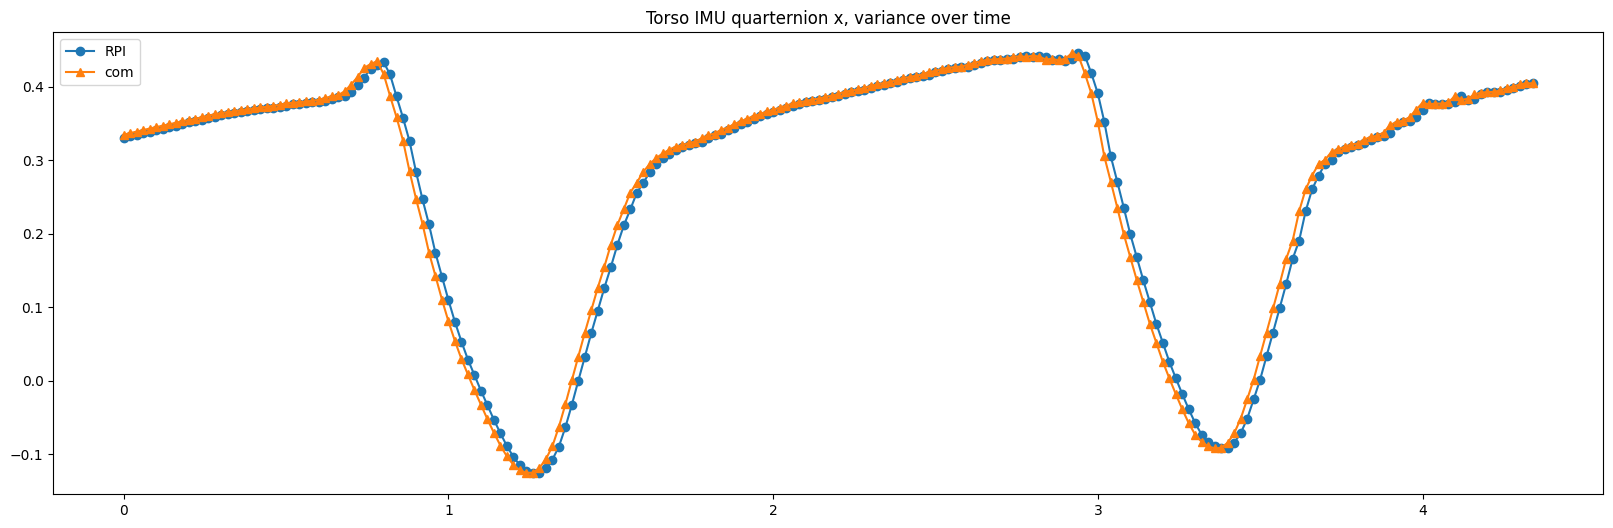

In [42]:

y_variable = "ulna_r_imu 1"

x = rpi_numer['time']
y_values = [y_variable]
plt.figure(figsize=(20,6))

for value in y_values:
    plt.plot(x,rpi_numer[value],label = 'RPI',marker= "o")
    plt.plot(x,com_numer[value],label = 'com',marker= "^")

plt.title("Torso IMU quarternion x, variance over time")
plt.legend()
plt.show()


Strange